무, 궁, 화, 꽃, 이, 피, 었, 습, 니, 다 폰트 이미지 생성 코드 입니다.

## 1. 라이브러리 임포트

In [58]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
from numpy.core.arrayprint import TimedeltaFormat
from tqdm import tqdm
import IPython.display as display
from matplotlib import font_manager

- <b>sys :</b> 파이썬 인터프리터를 제어할 수 있는 라이브러리
- <b>os :</b> 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해주는 라이브러리
- <b>numpy :</b> 배열 연산 라이브러리
- <b>matplotlib.pyplot :</b> 그래프 그리는 라이브러리
- <b>IPython.display :</b> Jupyter notebook에서 이미지를 표시해주는 라이브러리
- <b>Image :</b> Image를 열기, 닫기, 저장할 수 있게 해주는 라이브러리
- <b>ImageFont :</b> Image 위에 글씨크기와 폰트 스타일을 변경해주는 라이브러리
- <b>ImageDraw :</b> Image 위에 사각형, 원 등을 그릴 수 있게 해주는 라이브러리
- <b>TimedeltaFormat :</b> 확인 필요 
- <b>tqdm :</b> 진행 상황을 progress bar 형식으로 보여주는 라이브러리
- <b>font_manager :</b> matplotlib 를 이용해 그래프 그릴 때 한글 깨짐 현상을 방지해주는 라이브러리

## 2. 이미지 크기 지정

In [59]:
w, h = (256,256)

## 3. 한글 유니코드 값 가져오기

In [60]:
sylla = ["AD81", "AF43", "B2C8", "B2E4", "BB34", "C2B5", "C5C8", "C774", "C9DD", "D53C", "D654", "D65C"]

- AD81 : 궁
- AF43 : 꽃
- B2C8 : 니
- B2E4 : 다
- BB34 : 무
- C2B5 : 습
- C5C8 : 었
- C774 : 이
- D53C : 피
- D654 : 화

- D65C : 활
- C9DD : 짝

## 4. 폰트 목록 불러오기

In [4]:
font_path = "D:/workspace/SF-GNN/fonts/1_Gothic_select"
fonts = os.listdir("D:/workspace/SF-GNN/fonts/1_Gothic_select")

## 5. 한글 유니코드 데이터타입(list)을 넘파이 배열로 형변환

In [62]:
sylla = np.array(sylla)

- sylla[0] : AD81, 궁
- sylla[1] : AF43, 꽃
- sylla[2] : B2C8, 니
- sylla[3] : B2E4, 다
- sylla[4] : BB34, 무
- sylla[5] : C2B5, 습
- sylla[6] : C5C8, 었
- sylla[7] : C774, 이
- sylla[8] : C9DD, 짝
- sylla[9] : D53C, 피
- sylla[10] : D654, 화
- sylla[11] : D65C, 활

### sylla 데이터 길이 및 모양 확인

In [7]:
len(sylla)

12

In [8]:
sylla.shape

(12,)

## 6. 처음과 끝 유니코드 지정

In [63]:
start = "AD81"
end = "D65C"

In [64]:
s = np.where(start == sylla)[0][0]
e = np.where(end == sylla)[0][0]

- np.where : 조건을 만족하는 배열의 인덱스를 반환해주는 메서드
- start와 sylla가 같은 경우, 해당하는 인덱스를 s 변수에 저장, s값은 0이 된다.
- end와 sylla가 같은 경우, 해당하는 인덱스를 e 변수에 저장, e값은 11이 된다.

In [65]:
sylla = sylla[s : e + 1]

- s부터 e+1 번째 요소 모두 sylla 변수에 저장한다.

## 7. .....

In [15]:
for idx, ttf in enumerate(fonts) :
    font = ImageFont.truetype(font = font_path + "/" + ttf, size = 100)
    print("font : ",font)
    print(str(idx + 1))

font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A13506708>
1
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A13588808>
2
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A13203B48>
3
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A13591F08>
4
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A13596D08>
5
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A13588148>
6
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A1358C648>
7
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A13203B48>
8
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A135B14C8>
9
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A135B1B48>
10
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A135B1288>
11
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A135B3888>
12
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A135B1288>
13
font :  <PIL.ImageFont.FreeTypeFont object at 0x0000029A135B3908>
14
font :  <PIL.ImageFont.FreeTypeFont object 

## 8. 한글 폰트 이미지를 그래프로 띄워보기

ValueError: num must be 1 <= num <= 8, not 9

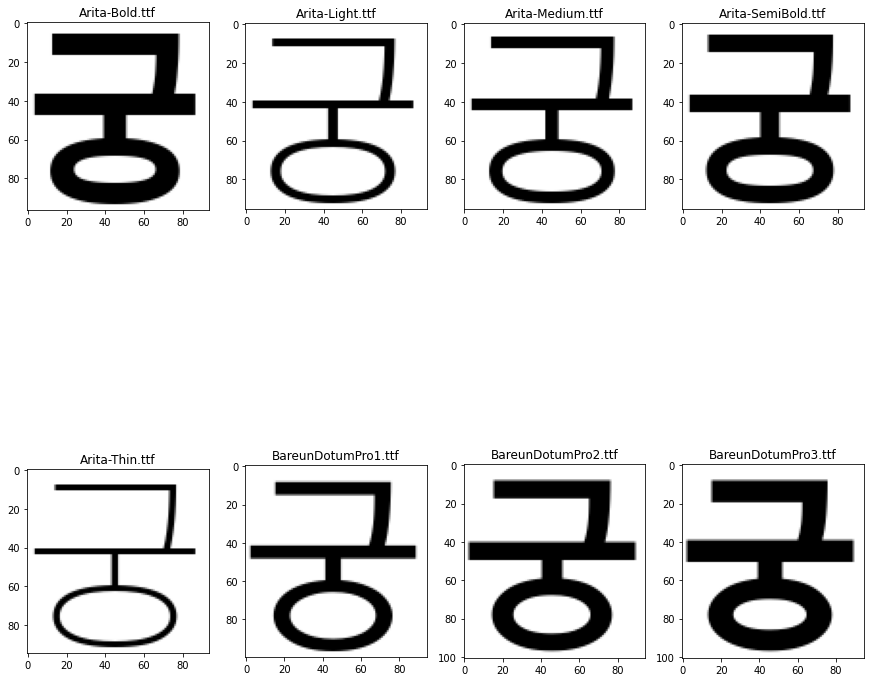

In [17]:
unicodeChars = chr(int(sylla[0], 16))
plt.figure(figsize=(15, 15))

for idx, ttf in enumerate(fonts):

    font = ImageFont.truetype(font = font_path + "/" + ttf, size = 100)

    x, y = font.getsize(unicodeChars)

    theImage = Image.new('RGB', (x + 3, y + 3), color='white')

    theDrawPad = ImageDraw.Draw(theImage)
    theDrawPad.text((0, 0), unicodeChars[0], font=font, fill='black')

    #plt.subplot("24{}".format(str(idx + 1)))
    plt.subplot(2,4,idx+1)
    plt.title(str(ttf))
    plt.imshow(theImage)
    
plt.show()

## 9. 한글 폰트 이미지를 생성하여 지정 경로에 저장하기

In [31]:
for uni in tqdm(sylla):
    
    unicodeChars = chr(int(uni, 16))
    path = "D:/workspace/SF-GNN/test5/1_Gothic_select/" +  unicodeChars
    os.makedirs(path, exist_ok = True)
        
    for ttf in fonts:
        
        font = ImageFont.truetype(font = font_path + "/" + ttf, size = 100)
        x, y = font.getsize(unicodeChars)
        
        theImage = Image.new('RGB', (x + 3, y + 3), color='white')
        theDrawPad = ImageDraw.Draw(theImage)
        theDrawPad.text((0.0, 0.0), unicodeChars[0], font=font, fill='black' )
        
        msg = path + "/" + ttf[:-4] + "_" + unicodeChars
        
        theImage.save('{}.png'.format(msg))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 23.03it/s]


## 10. 경로 내 이미지들 사이즈 한 번에 확인해보기

In [42]:
from PIL import Image
import os.path

targetdir = r"D:\workspace\SF-GNN\test\1_Gothic_select\궁"

format = ['.jpg','.png','.jpeg','.bmp','.JPG','.PNG','.JPEG','.BMP']

for (path,dirs,files) in os.walk(targetdir):
    for file in files:
        if file.endswith(tuple(format)):
            image = Image.open(path+"\\"+file)
            print(image.filename)
            print(image.size)

D:\workspace\SF-GNN\test\1_Gothic_select\궁\08SeoulNamsanB_궁.png
(93, 101)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\10X10_궁.png
(93, 100)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\12LotteMartDreamMedium_궁.png
(91, 99)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\12LotteMartHappinessMedium_궁.png
(93, 100)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\Arita-buriM_궁.png
(98, 106)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\Arita-Medium_궁.png
(94, 96)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\BareunBatangM_궁.png
(95, 97)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\BareunDotumPro1_궁.png
(95, 100)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\BinggraeTaom_궁.png
(98, 122)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\BMHANNAAir_궁.png
(84, 92)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\BMJUA_궁.png
(85, 95)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\DaehanR_궁.png
(94, 99)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\DXGothic_10_궁.png
(103, 97)
D:\workspace\SF-GNN\test\1_Gothic_select\궁\GothicA1-Medium_궁.pn